# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile VII: Time Series Chains Calibration Instruction:
https://docs.google.com/presentation/d/1-jEynFIkjDR88QFtbHN2Iz8DXY8wMVet/edit#slide=id.p1

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [1]:
import core.testdata as testdata
import core.utils as utils
import core.calculate as calculate
import core.visualize as visualize

## Chain Calibration Dataset (MP VII) ##
Artificial Time Series Data for Testing chain discovery algorithms.
Each time series has a chain, with eight links, and each link is of length 127.

Answering the following questions:
- Can we find the chains if we give the wrong length?
- Can we find the chains if we delete (or add huge amount of noise to) one or two links in the chain?
- Does it help or hurt to smooth the data?
- etc


Instructions: 
https://docs.google.com/presentation/d/1-jEynFIkjDR88QFtbHN2Iz8DXY8wMVet/edit#slide=id.p1

m = 127, 8 links

recall and precision: hits are with overlap > 50%

In [2]:
# Parameter
use_case = "chains"
data_name = "chain_test_1"
T = testdata.load_from_txt("../data/" + use_case + "/" + data_name + ".txt")

ground_truth = [139, 925, 1298, 2608, 2816, 3748, 4699, 5269] # ground_truth_chain_test_1
# ground_truth = [736, 1836, 2930, 3319, 4225, 5434, 6058, 6864] # ground_truth_chain_test_2
# ground_truth = [46, 722, 2028, 2294, 2814, 3988, 5237, 6349] # ground_truth_chain_test_3
# ground_truth = [1232, 1724, 2382, 2631, 3970, 4525, 4918, 5773] # ground_truth_chain_test_4

chain_test_1: d = 5 is the only one that finds all 8 links and performs "better" than no dilation 

### Experiments ###

In [3]:
# Hyperparameter
target_w = 127
m = None
max_dilation = utils.calculate_max_d_from_m(m, len(T), max_d=10) if target_w is None else utils.calculate_max_d_from_target_w(target_w)
non_overlapping = False # if True, overlapping chains are filtered
offset = False # if offset=True, the chains with dilation are calculated with a starting offset of the chain without dilation

print("Dilation Sizes:", [i for i in range(1, max_dilation+1)])

Dilation Sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [4]:
# calculate:
calculate.chains(T, max_dilation, data_name, use_case, ground_truth, offset, non_overlapping, target_w, m)

Running Experiment: target_w=127, m=None, offset=False, groundtruthD1=False, nonoverlapping=False
Calculated MP for: w=127, m=127, d=1, offset=0, groundtruthD1=False, nonoverlapping=False
Calculated MP for: w=127, m=64, d=2, offset=0, groundtruthD1=False, nonoverlapping=False
Calculated MP for: w=127, m=43, d=3, offset=0, groundtruthD1=False, nonoverlapping=False
Calculated MP for: w=129, m=33, d=4, offset=0, groundtruthD1=False, nonoverlapping=False
Calculated MP for: w=126, m=26, d=5, offset=0, groundtruthD1=False, nonoverlapping=False
Calculated MP for: w=127, m=22, d=6, offset=0, groundtruthD1=False, nonoverlapping=False
Calculated MP for: w=127, m=19, d=7, offset=0, groundtruthD1=False, nonoverlapping=False
Calculated MP for: w=129, m=17, d=8, offset=0, groundtruthD1=False, nonoverlapping=False
Calculated MP for: w=127, m=15, d=9, offset=0, groundtruthD1=False, nonoverlapping=False
Calculated MP for: w=131, m=14, d=10, offset=0, groundtruthD1=False, nonoverlapping=False
Calculated

Visualizing Experiment: target_w=127, m=None, offset=False, groundtruthD1=False, nonoverlapping=False
chain for d=1, m=127, w=127: [ 136  925 1299 2610 2818 3750 4701]
chain for d=2, m=64, w=127: [ 132  921 1295 2606 2815 5268]
chain for d=3, m=43, w=127: [ 128  917 1291 2602 2811 5264]
chain for d=4, m=33, w=129: [ 130  919 1293 2604 2813 5266]
chain for d=5, m=26, w=126: [ 133  922 1297 2608 2817 3749 4700 5271]
chain for d=6, m=22, w=127: [ 109  898 2583 2792 3723]
chain for d=7, m=19, w=127: [ 202  990 2881 3813 4231 4343]
chain for d=8, m=17, w=129: [ 144  932 1307 2618 4710]
chain for d=9, m=15, w=127: [ 129  918 1292 2603 2811]
chain for d=10, m=14, w=131: [ 138  927 1301 2611 4703]
chain for d=11, m=12, w=122: [1299 2610 2819 3751 4702 5272]


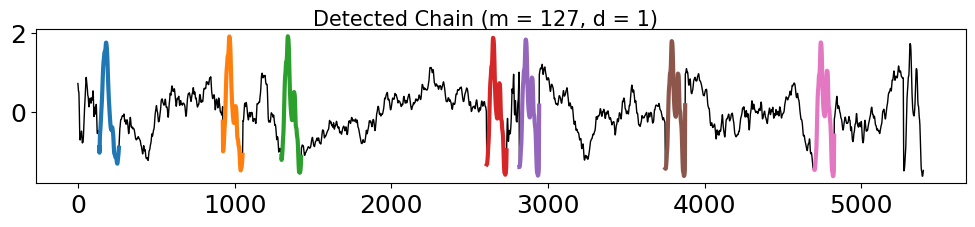

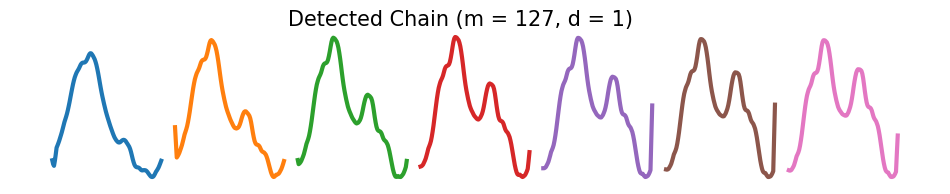

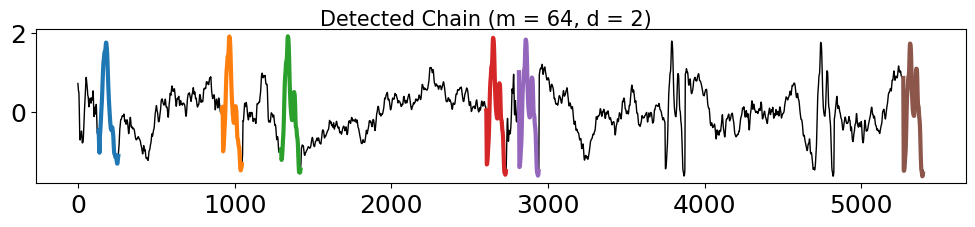

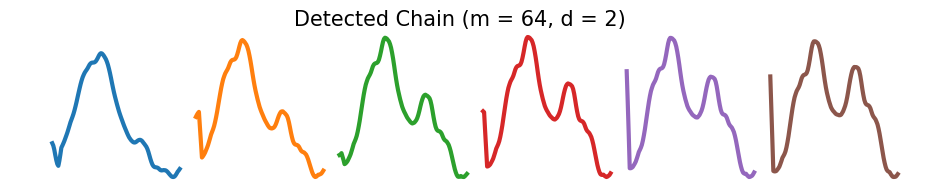

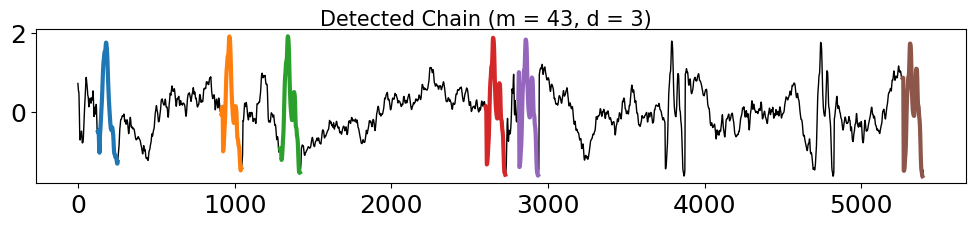

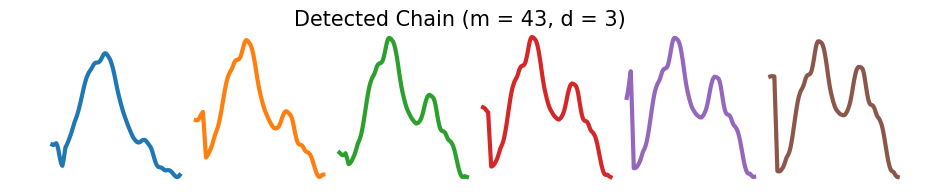

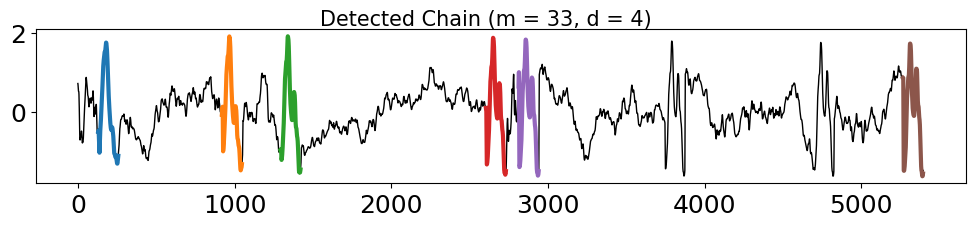

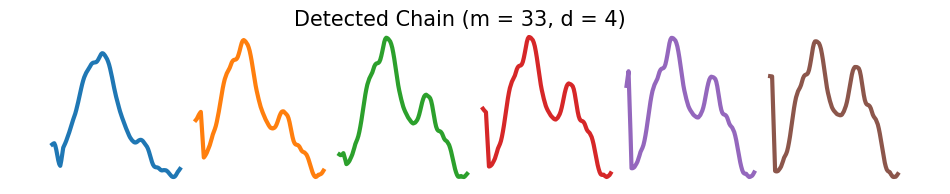

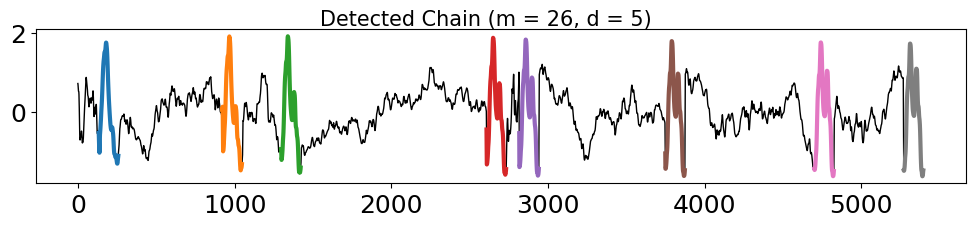

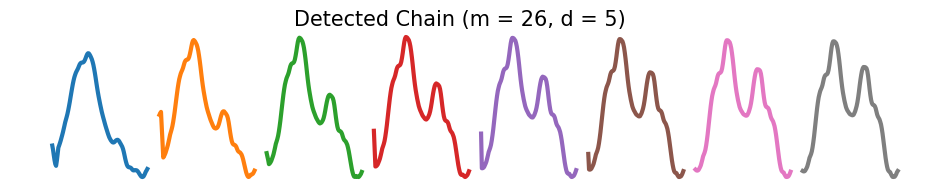

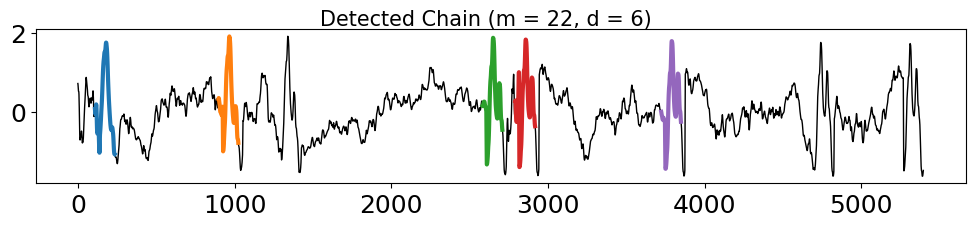

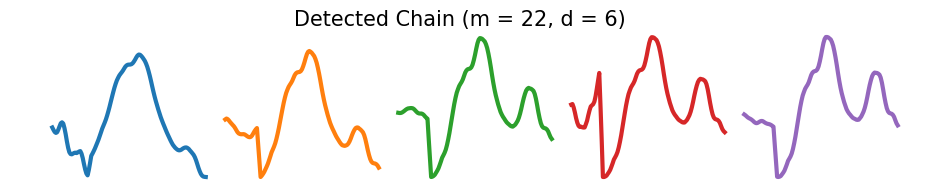

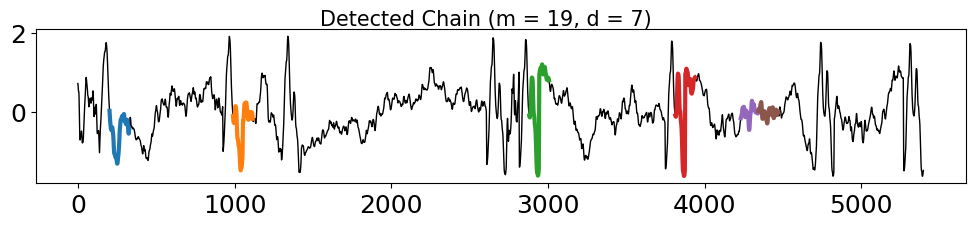

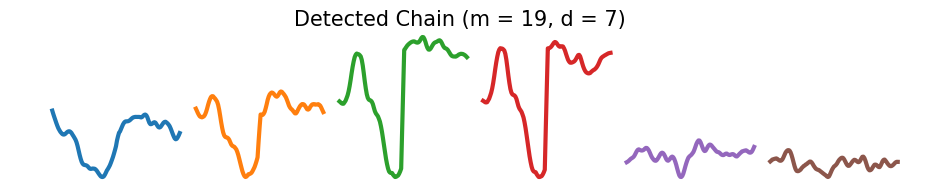

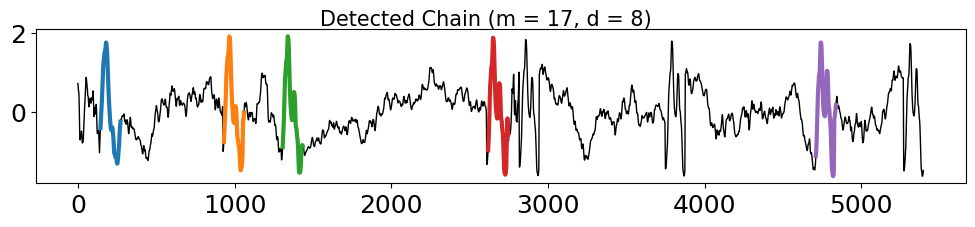

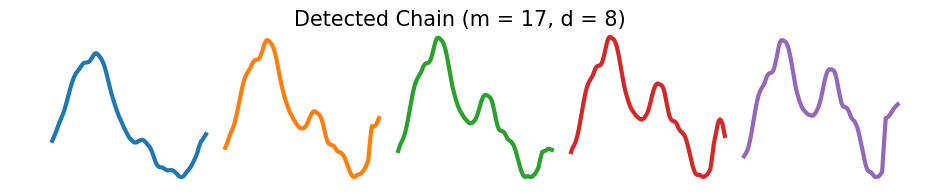

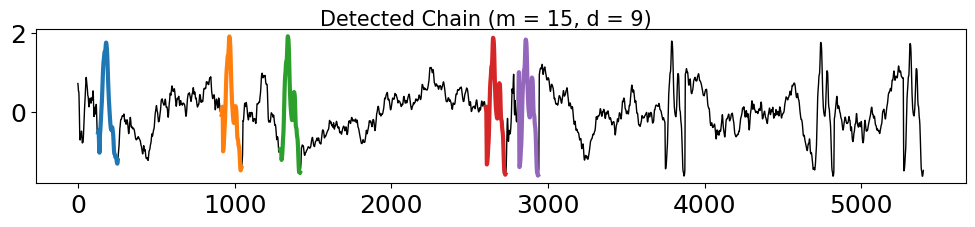

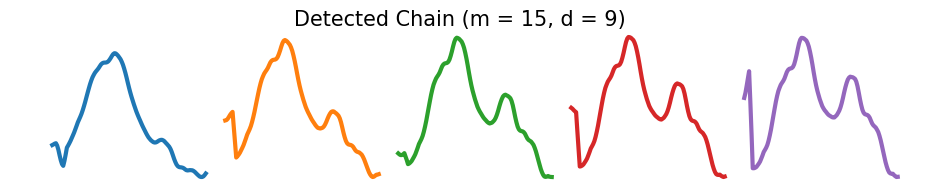

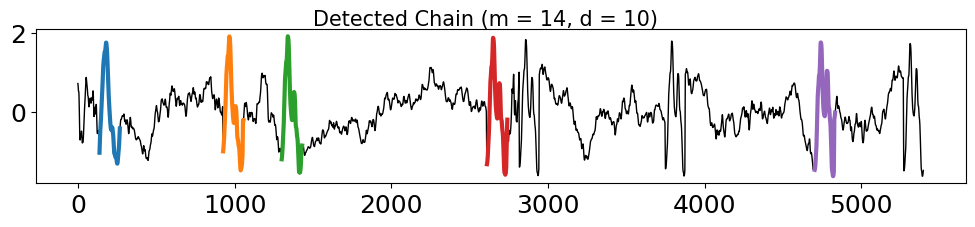

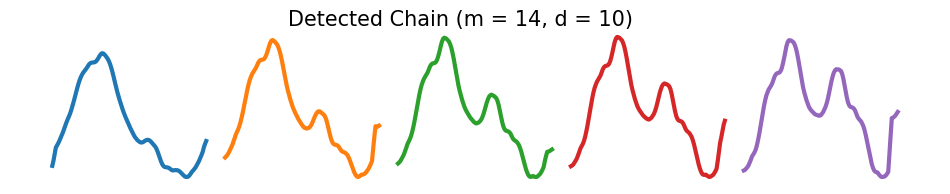

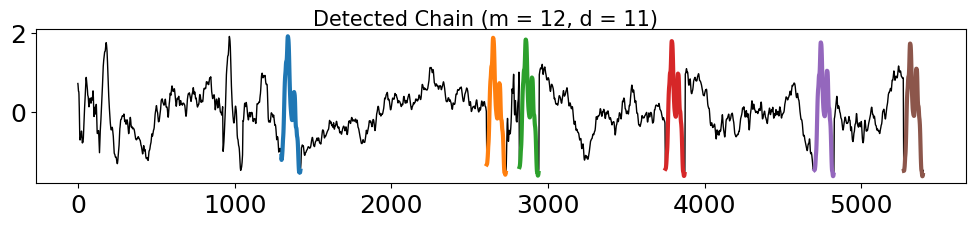

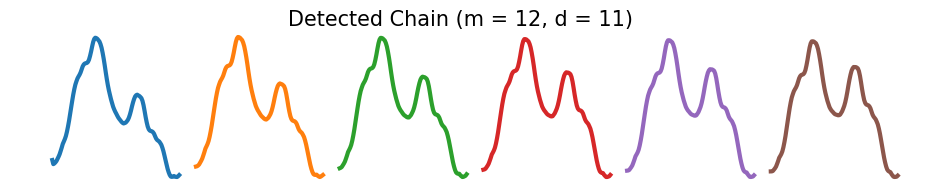

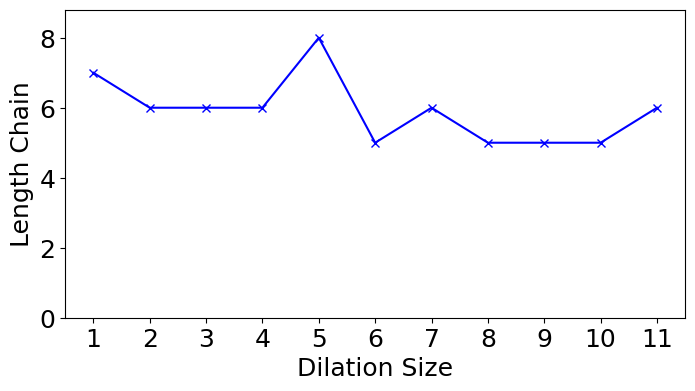

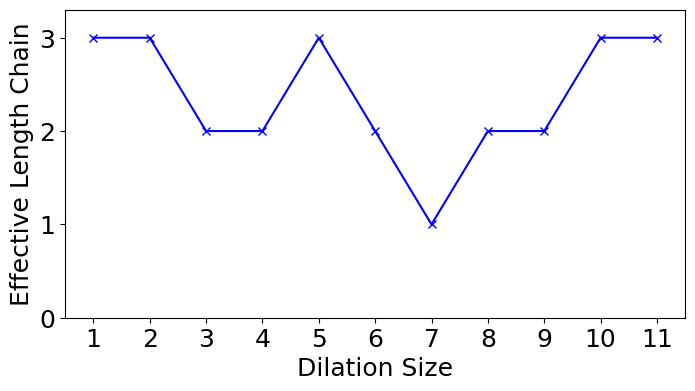

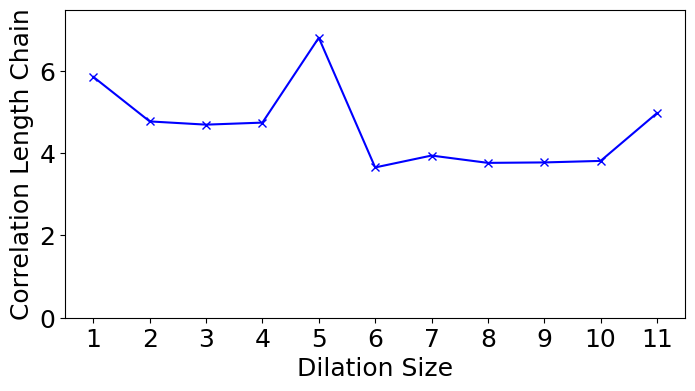

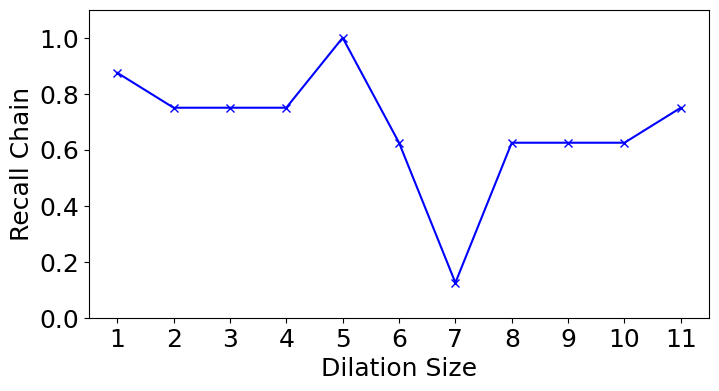

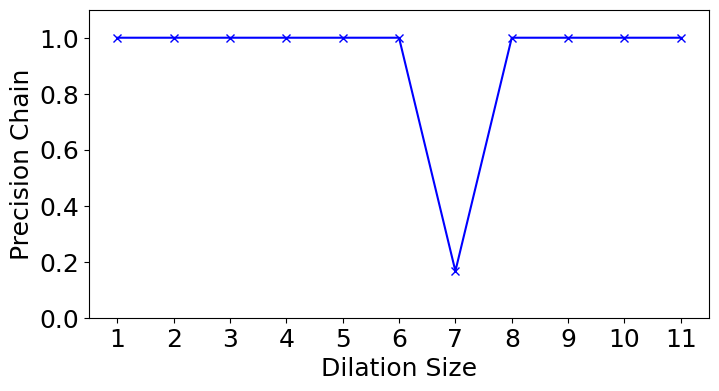

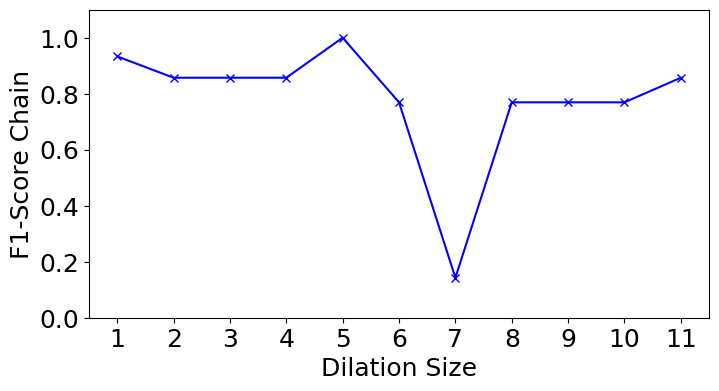

In [5]:
# visualize:
visualize.chains(max_dilation, data_name, use_case, offset, non_overlapping, target_w, m, ground_truth)